## Sistemas Dinámicos 2D

__Ejercicio 1__: Resolver con Runge-Kutta orden 4 el sistema \begin{align} \dot x &= y-y^3\ \dot y &= -x -y^2 \end{align}
Grafiquen muchas trayectorias en el espacio de fase, utilizando condiciones iniciales aleatorias.
Calculen el Jacobiano de $\vec F=\left(y-y^3,-x-y^2 \right)^{\text{T}}$ y evaluenlo en $\vec 0$, el cual es un punto fijo. Calculen $\Delta$ y $\tau$ e indiquen que tipo de punto fijo es el $\vec 0$.

In [1]:
using PyPlot

In [2]:
function RK4(f,list,x0) #Definimos Runge-Kutta de orden 4, como se ha hecho en notebooks anteriores
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        k1 = f(x,t)
        k2 = f(x+(h/2)*k1,t+(h/2))
        k3 = f(x+(h/2)*k2, t+(h/2))
        k4 = f(x+h*k3, t+h);
        x = x+(h/6)*(k1+2*k2+2*k3+k4)
        push!(listx,x) 
     end
     return listx
end

RK4 (generic function with 1 method)

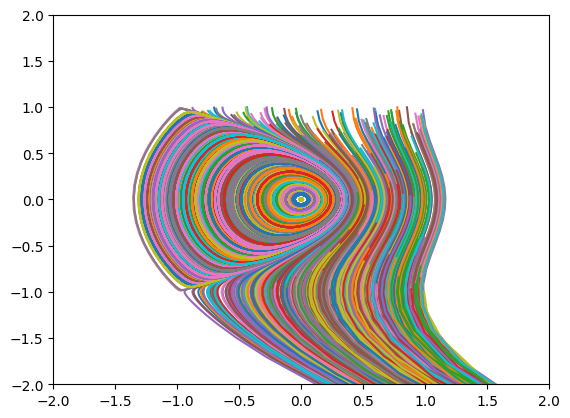

(-2, 2)

In [3]:
#Definimos nuestra matriz y un intervalo de tiempo (listt)
T(x,t)=[1*x[2]-1*(x[2])^3,-1*x[1]-1*(x[2])^2] 

listt=0:0.1:30 

for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],RK4(T,listt,[x0,y0]))
    listy=map(x->x[2],RK4(T,listt,[x0,y0]))
    
    plot(listx,listy)
end
xlim(-2,2)
ylim(-2,2)

Ahora si queremos calcular el jacobiano de $\vec F=\left(\begin{array}{cc} y - y^3 \\-x-y^2 \end{array} \right)$ por tanto, sacamos la derivadas parciales.

$$J\vec F=\left(\begin{array}{cc} \frac{\partial }{\partial x}(y - y^3) &\frac{\partial}{\partial y}(y - y^3)  \\ \frac{\partial}{\partial x}(-x-y^2) &\frac{\partial}{\partial y}(-x-y^2)  \end{array} \right) = \left(\begin{array}{cc} 0 &1-3y^2  \\ -1 &-2y  \end{array} \right)$$ 

Ahora si lo evaluamos en $\vec 0 = (0,0) $

$$J\vec F (\vec 0) = \left(\begin{array}{cc} 0 & 1  \\ -1 & 0  \end{array} \right) $$

Podemos notar que $\Delta= \det J\vec F (\vec 0) = 1$, y que $\tau=\text{tr} J\vec F (\vec 0)= 0$. 

Así concluimos que $\vec 0$ es _un punto centro_.

__Ejercicio 2__: Resolver usando Runge-Kutta orden 4 para resolver el oscilador de van der Pol: $${d^2x \over dt^2}-\mu(1-x^2){dx \over dt}+x= 0$$
Graficar muchas trayectorias, construidas a partir de condiciones iniciales aleatorias, en el espacio de fase. Observa alguna estructura en particular?

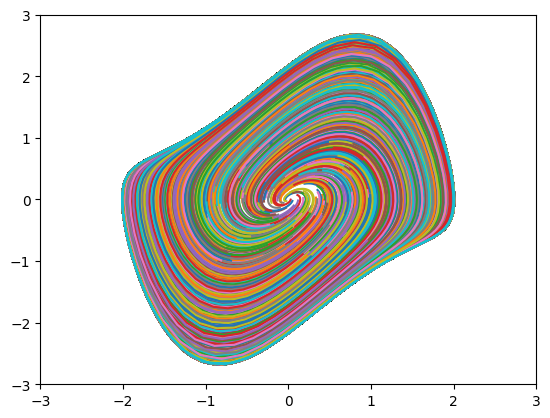

(-3, 3)

In [4]:
#Primero Definimos nuestra función.

f(x,t)=[x[2],-x[1]+x[2]*(1-x[1]^2)] 
listt2=0:0.1:20 

for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],RK4(f,listt2,[x0,y0]))
    listy=map(x->x[2],RK4(f,listt2,[x0,y0]))
    
    plot(listx,listy)
end
xlim(-3,3)
ylim(-3,3)

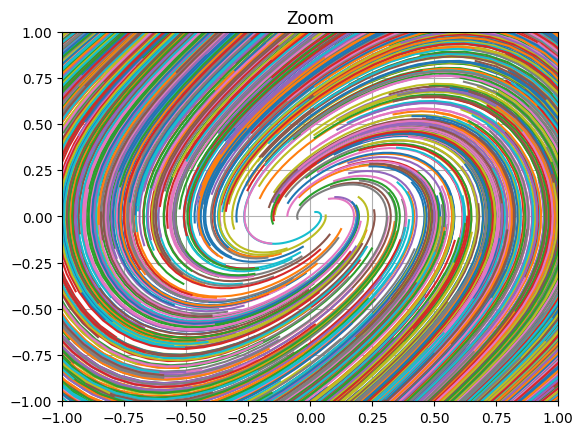

(-1, 1)

In [5]:
#Ahora hacemos un zoom a la gráfica anterior
title("Zoom")
grid("on")
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],RK4(f,listt2,[x0,y0]))
    listy=map(x->x[2],RK4(f,listt2,[x0,y0]))
    
    plot(listx,listy)
end

xlim(-1,1)
ylim(-1,1)

Se pueden observar espirales, y parece que convergen en el origen

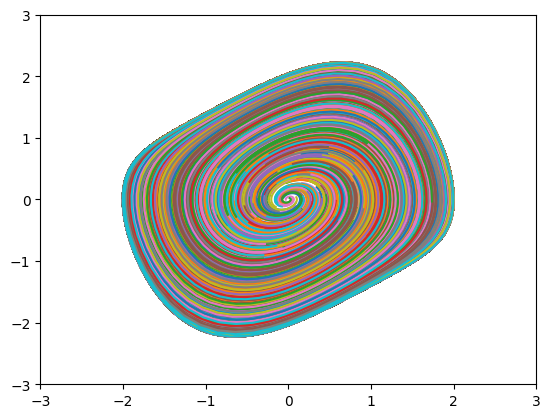

(-3, 3)

In [7]:
#Ahora usando mu=0.5 y graficando varias trayectorias

g(x,t)=[x[2],-x[1]+x[2]*0.5*(1-x[1]^2)] 
listt3=0:0.1:20
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],RK4(g,listt3,[x0,y0]))
    listy=map(x->x[2],RK4(g,listt3,[x0,y0]))
    
    plot(listx,listy)
end
xlim(-3,3)
ylim(-3,3)

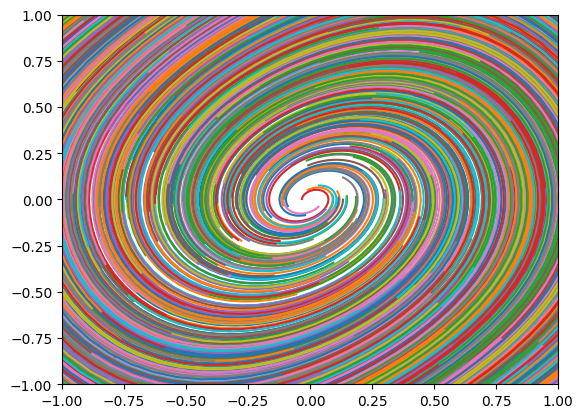

(-1, 1)

In [9]:
#Otra vez, para ver mejor el resultado, hacemos un zoom a la gráfica naterior
g(x,t)=[x[2],-x[1]+x[2]*0.5*(1-x[1]^2)] 
listt3=0:0.1:20
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],RK4(g,listt3,[x0,y0]))
    listy=map(x->x[2],RK4(g,listt3,[x0,y0]))
    
    plot(listx,listy)
end
xlim(-1,1)
ylim(-1,1)

EN primer lugar nótese que las espirales se hacen más "regulares" y otra vez, parece que convergen en el origen.